# Orders analysis

**Objective**

get an understanding of:
- `orders properties`
- their associated `review_scores`

In [13]:
# import modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from olistpackage.order import Order

In [14]:
# magic commands

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# instantiate Order class
# and import the training data including the distance seller-customer
order = Order()
orders = order.get_training_data(with_distance_seller_customer=True)

In [9]:
# check the shape of orders dataframe
orders.shape 

(95872, 13)

In [16]:
# Five first rows of orders dataframe
orders.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,17.038727
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,616.030456
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,342.337062
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,1538.493112
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,30.820998


**`orders dataset` features:**

| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `order_id` 	| str 	| the id of the order 	|
| `wait_time` 	| float 	| the number of days between order_date and delivered_date 	|
| `expected_wait_time` 	| float 	| the number of days between order_date and estimated_delivery_date 	|
| `delay_vs_expected` 	| float 	| if the actual delivery date is later than the estimated delivery date, returns the number of days between the two dates, otherwise return 0 	|
| `order_status` 	| str 	| the status of the order 	|
| `dim_is_five_star` 	| int 	| 1 if the order received a five-star review, 0 otherwise 	|
| `dim_is_one_star` 	| int 	| 1 if the order received a one_star, 0 otherwise 	|
| `review_score` 	| int 	| from 1 to 5 	|
| `number_of_products` 	| int 	| number of products that the order contains 	|
| `number_of_sellers` 	| int 	| number of sellers involved in the order 	|
| `price` 	| float 	| total price of the order paid by customer 	|
| `freight_value` 	| float 	| value of the freight paid by customer 	|
| `distance_customer_seller` 	| float 	| the distance in km between customer and seller (optional) 	|  

## 1 - Inspect features

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95872 entries, 0 to 95879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  95872 non-null  object 
 1   wait_time                 95872 non-null  float64
 2   expected_wait_time        95872 non-null  float64
 3   delay_vs_expected         95872 non-null  float64
 4   order_status              95872 non-null  object 
 5   dim_is_five_star          95872 non-null  int64  
 6   dim_is_one_star           95872 non-null  int64  
 7   review_score              95872 non-null  int64  
 8   number_of_products        95872 non-null  int64  
 9   number_of_sellers         95872 non-null  int64  
 10  price                     95872 non-null  float64
 11  freight_value             95872 non-null  float64
 12  distance_seller_customer  95872 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 10.2+ MB


In [8]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000
mean,12.513442,23.739059,0.753349,0.592112,0.097651,4.155509,1.141783,1.013914,136.692876,22.749945,518.009152
std,9.454868,8.766518,4.656587,0.491445,0.296844,1.285113,0.535848,0.123635,207.672996,21.517061,480.660902
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000,0.000000
25%,6.754850,18.326979,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.820000,162.716166
50%,10.203727,23.230556,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,85.990000,17.160000,392.317464
75%,15.659560,28.414525,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,23.990000,688.689726
max,208.351759,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000,7717.341461


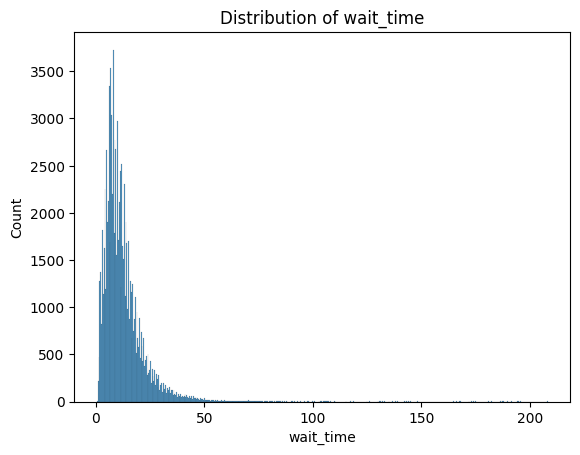

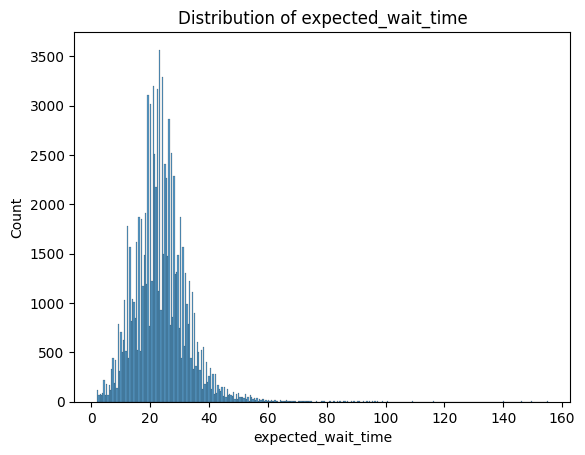

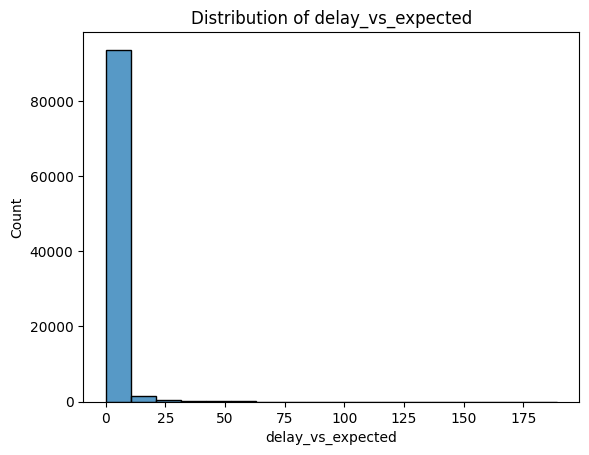

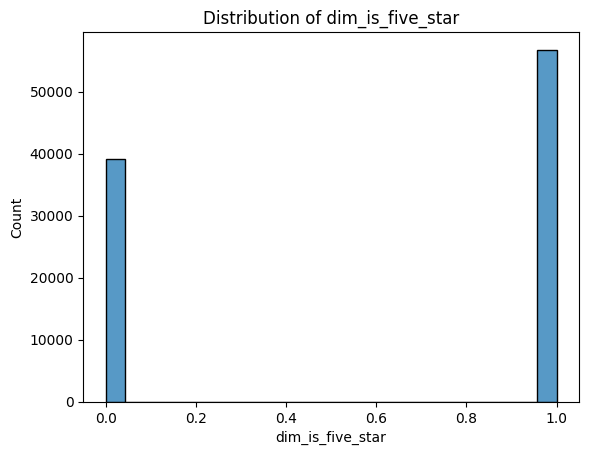

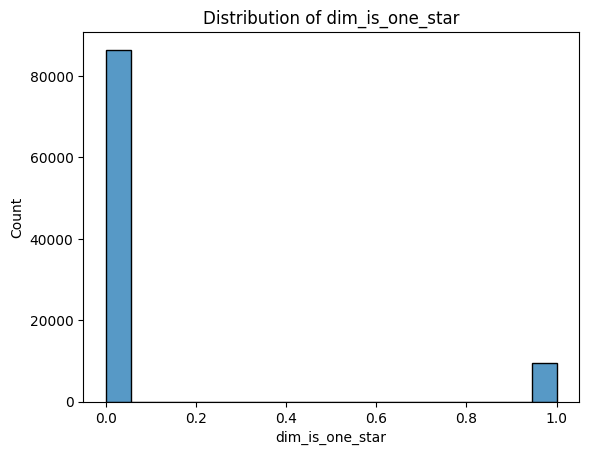

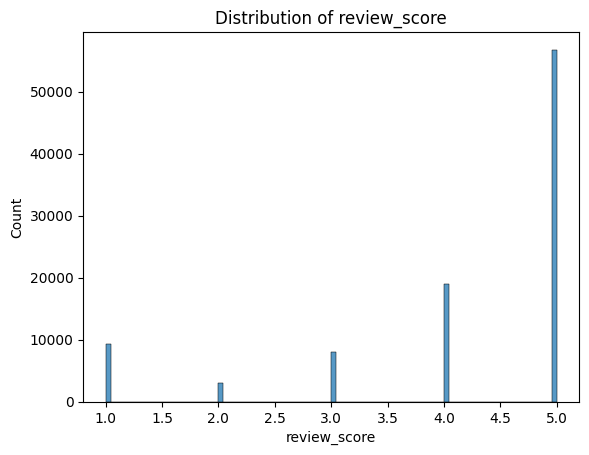

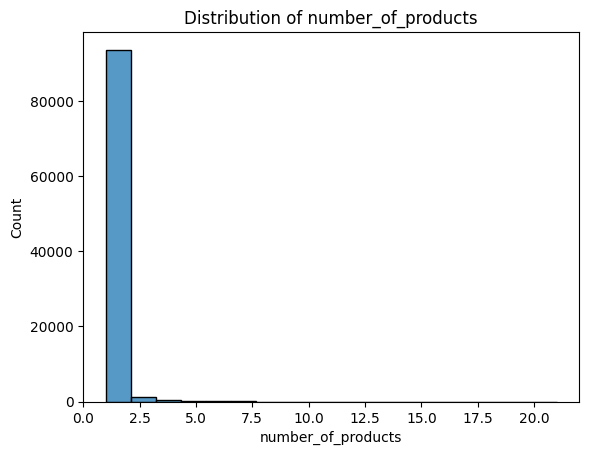

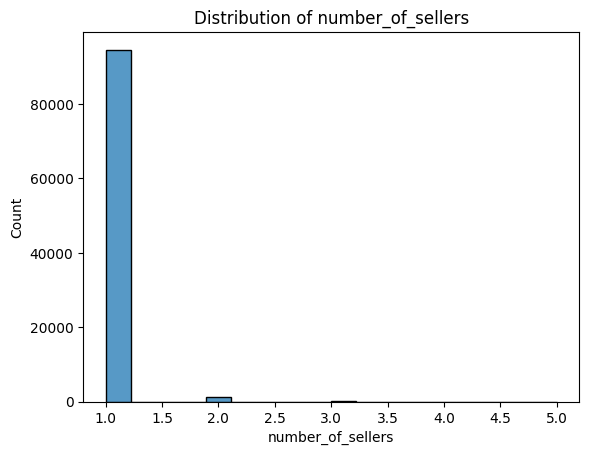

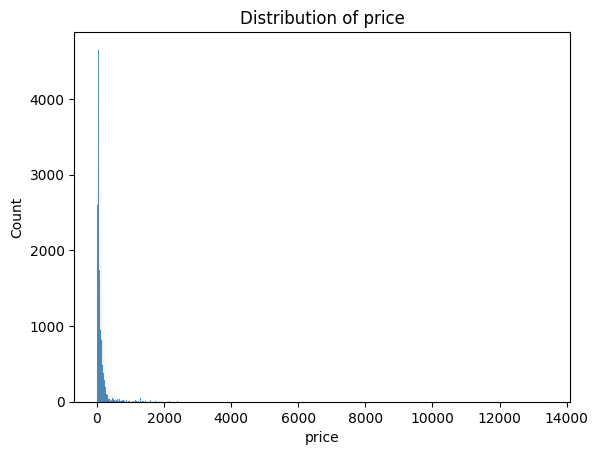

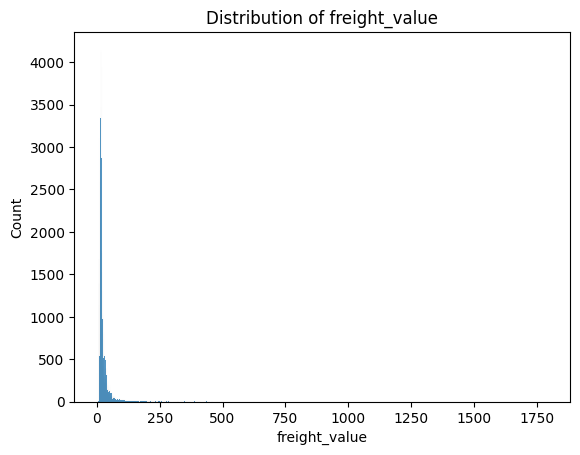

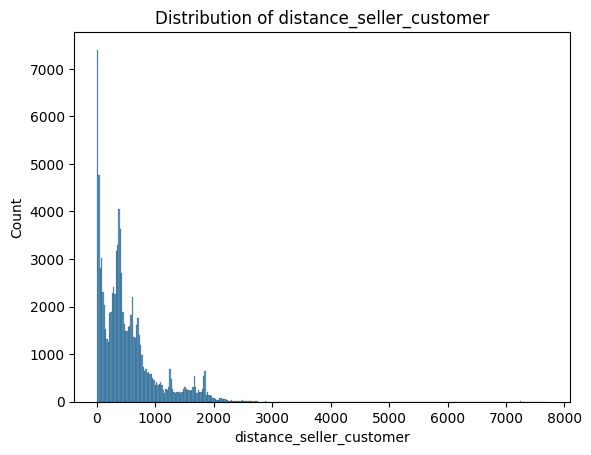

In [34]:
# Plot distribution for the numerical features available in the orders dataset
for col in orders.select_dtypes(exclude=['object']):
    sns.histplot(orders[col]).set_title(f"Distribution of {col}")
    plt.show()

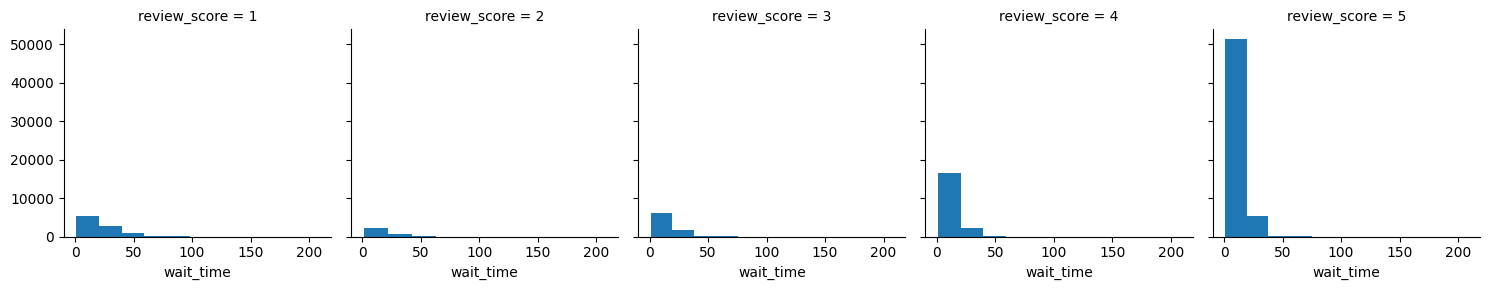

In [10]:
# histograms for each review_score vs. wait_time
sns.FacetGrid(data=orders, col="review_score").map(plt.hist, "wait_time");

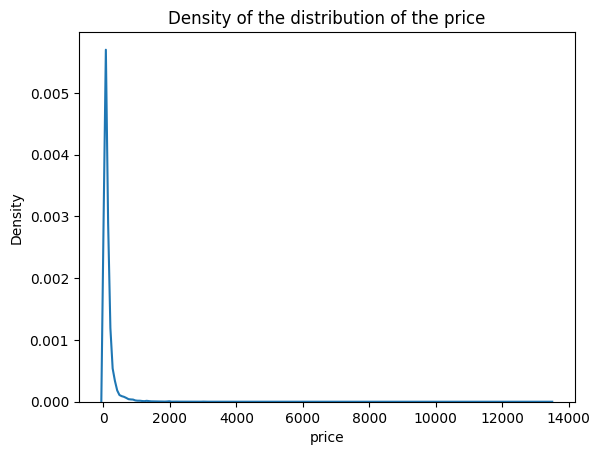

In [11]:
#Density of the distribution of the price
sns.kdeplot(orders['price']).set_title("Density of the distribution of the price");

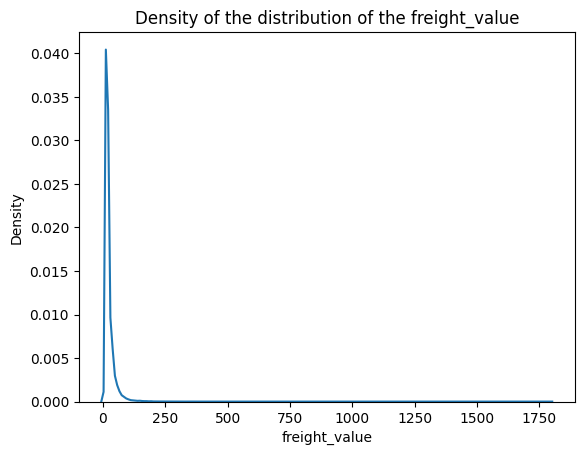

In [12]:
#Density of the distribution of the freight_value
sns.kdeplot(orders['freight_value']).set_title("Density of the distribution of the freight_value");

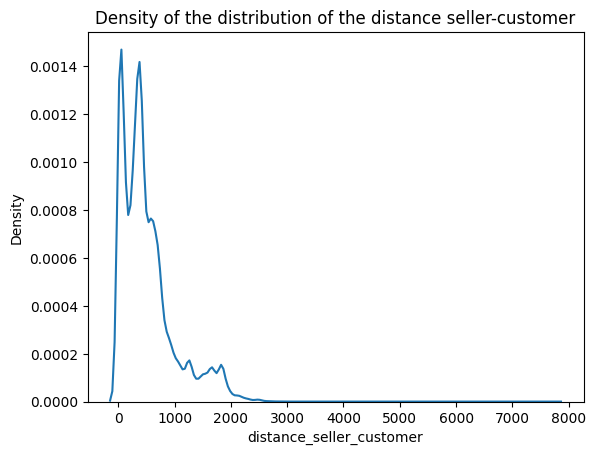

In [13]:
#Density of the distribution of the distance seller-customer
sns.kdeplot(orders['distance_seller_customer']).set_title("Density of the distribution of the distance seller-customer");

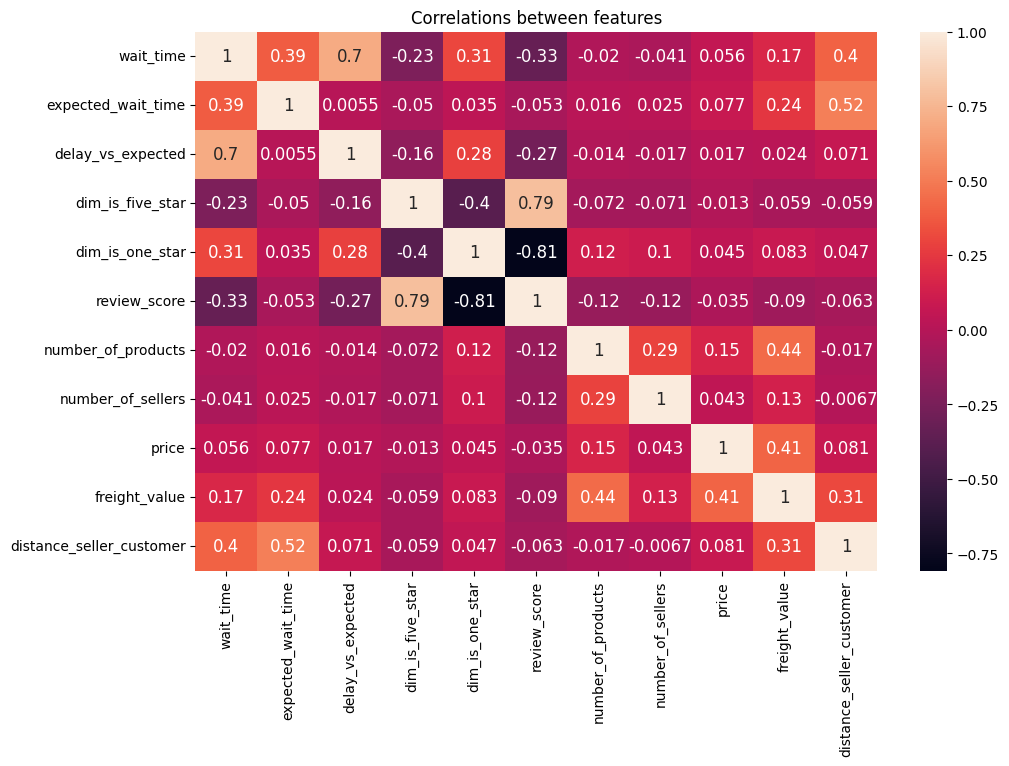

In [14]:
# Correlations between features - correlation plot
plt.figure(figsize=(11,7))
sns.heatmap(orders.corr(), annot = True, annot_kws={"size": 12}).set_title("Correlations between features");

In [15]:
# Correlations between review_score vs. each feature
# the higher the coefficient, the more one given feature is correlated (positively or negatively) with the review_score
round(np.abs(orders.corr()['review_score']).sort_values(ascending = False),2)

review_score                1.00
dim_is_one_star             0.81
dim_is_five_star            0.79
wait_time                   0.33
delay_vs_expected           0.27
number_of_products          0.12
number_of_sellers           0.12
freight_value               0.09
distance_seller_customer    0.06
expected_wait_time          0.05
price                       0.03
Name: review_score, dtype: float64

In [16]:
# Correlations between review_score vs. each feature (positively or negatively)
round(orders.corr()['review_score'],2)

wait_time                  -0.33
expected_wait_time         -0.05
delay_vs_expected          -0.27
dim_is_five_star            0.79
dim_is_one_star            -0.81
review_score                1.00
number_of_products         -0.12
number_of_sellers          -0.12
price                      -0.03
freight_value              -0.09
distance_seller_customer   -0.06
Name: review_score, dtype: float64

* review_score is strongly correlated to dim_is_one_star and dim_is_five_star, which is obvious. 

* The two next highest correlation coefficients with respect to the review_score are :
     * wait_time : -33 %
     * delay_vs_expected : -27 %

## 2 - Simple regression of `review_score` against delivery duration

It seems that review_score is mostly correlated with wait_time and delay_vs_expected.

Let's investigate  these correlations with Seaborn.

### 2.1 Plots

In [17]:
# random sub-sample of 10,000 rows
sample = orders.sample(10000, random_state=1)

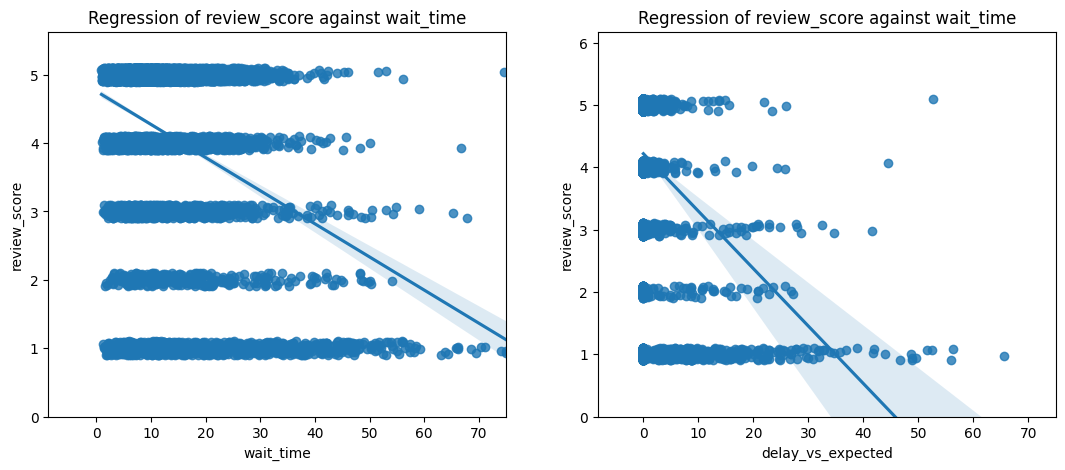

In [18]:
plt.figure(figsize=(13,5))

# regression of review_score against wait_time
plt.subplot(1,2,1)
sns.regplot(x=sample['wait_time'], y=sample['review_score'], y_jitter=.1).set_title("Regression of review_score against wait_time");
plt.xlim(right=75)
plt.ylim(bottom=0);

# regression of review_score against delay_vs_expected
plt.subplot(1,2,2)
sns.regplot(x=sample['delay_vs_expected'], y=sample['review_score'], y_jitter=.1).set_title("Regression of review_score against wait_time");
plt.xlim(right=75)
plt.ylim(bottom=0);

### 2.2 Interpretation:

There are only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") and the regression is done against two continuous values that are `wait_time` and `delay_vs_exp`. So it doesn't look so interpretable.

But based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score.

- `Slope wait_time ≈ -0.05` : For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05
- `Slope delay ≈ -0.1` : For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1

### Inferential analysis

* As these orders represent 16 months only of data, are these coefficients statistically significant?
* Are these coefficients able to generalize well to future orders (all else being equal) ? 
* Is it sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? 

`Seaborn` computes the 95% confidence interval with a shaded blue cone around the regression lines.

Visualization of the two confidence intervals while changing the sample size and the `regplot` parameter ci (confidence interval):

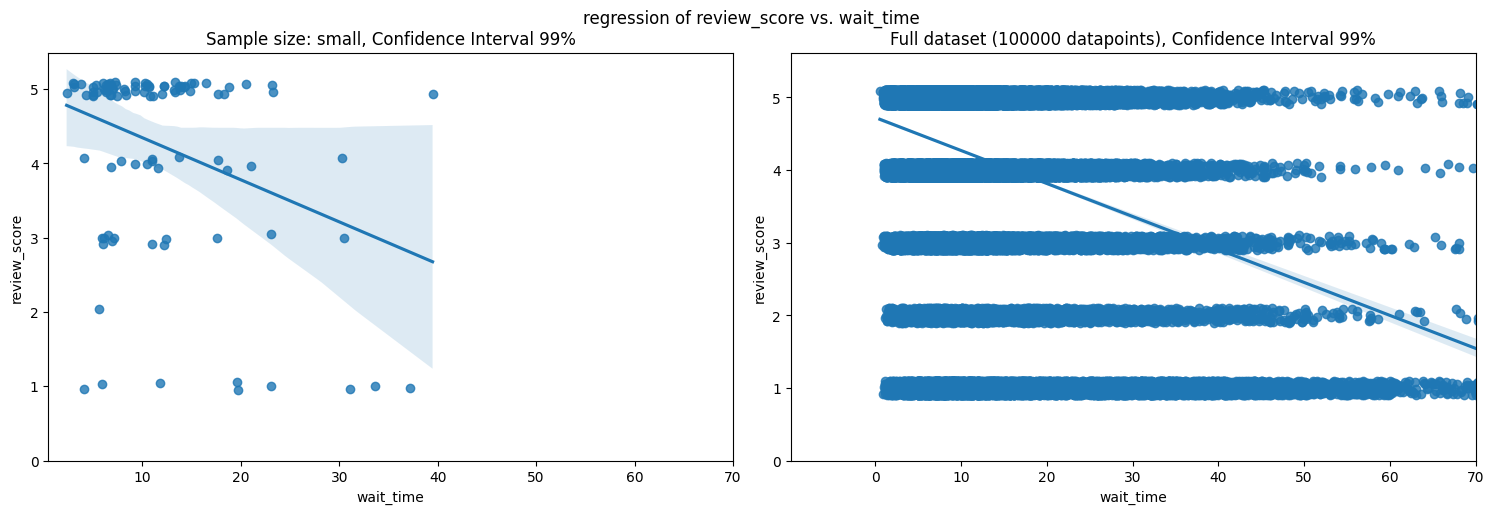

In [19]:
sample = orders.sample(100, random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

fig.suptitle('regression of review_score vs. wait_time')
fig.tight_layout()

plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=99) \
    .set_title("Sample size: small, Confidence Interval 99%")
plt.xlim(right=70)
plt.ylim(bottom=0);

plt.subplot(1,2,2)
sns.regplot(x = orders.wait_time, y= orders.review_score, y_jitter=.1, ci=99) \
    .set_title("Full dataset (100000 datapoints), Confidence Interval 99%");
plt.xlim(right=70)
plt.ylim(bottom=0);

**Interpretation:**

* **Null Hypothesis** $H_0$ : "the impact of delivery time on review scores is almost zero", a.k.a its coefficient is equal to zero

* When plotting all the datapoints:
    * The 95% confidence interval for the slope does not contain the value 0.
        * We are `95% confident that slower deliveries are associated with weaker reviews`.
    * The **`p-value`** associated with the null hypothesis is lower than 5%.
        * We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

However, **correlation does not imply causality**: certain products can be slower to deliver (e.g. heavy products), so this categories of products might often have a low review_score, not matter how long their delivery time is. 

* A simple univariate regression can't identify **confounding factor**.
* Deeper analysis will be done below to identifying **confounding factor**.

### 2.4 Univariate regression with `statsmodels`

It is now known that `review_score` is mostly correlated with  two features : `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. 

Let's use `statsmodels` to distinguish the effect of one feature, **holding the other features constant**.

In [20]:
 # model1: an ols regression of review_score over wait_time
    
model1 = smf.ols('review_score ~ wait_time', data=orders).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:29:06   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    727.904      0.0

In [21]:
# model2: an ols regression of review_score over delay_vs_expected

model2 = smf.ols('review_score ~ delay_vs_expected', data=orders).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:29:09   Log-Likelihood:            -1.5639e+05
No. Observations:               95872   AIC:                         3.128e+05
Df Residuals:                   95870   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2121      0.00

These results match those of the previous `seaborn regplot`.

## 3 - Multivariate regression

What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, let's run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable).

In [22]:
# model 3: 

model3 = smf.ols('review_score ~ wait_time + delay_vs_expected', data=orders).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:29:11   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6502      0.00

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`.

R-squared is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`.

Let's try to add more features to our regression to improve the explainability of the linear regression with model4.

In [17]:
# model4 - features:
# exclude the features that are directly derived from the `review_score` to avoid data leaks
# exclude two features perfectly collinear with each other

features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value",
    "distance_seller_customer",
]

In [18]:
# model4 - standardize the features
# transform each feature X into its respective z-score (X-mu)/sigma
# in order to compare the partial regression cofficients together

orders_standardized = orders.copy()

for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)
    
orders_standardized

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,-0.431192,15.544063,-0.161781,delivered,0,0,4,-0.264595,-0.112544,-0.513802,-0.652038,-1.042253
1,53cdb2fc8bc7dce0b6741e2150273451,0.134174,19.137766,-0.161781,delivered,0,0,4,-0.264595,-0.112544,-0.086640,0.000467,0.203930
2,47770eb9100c2d0c44946d9cf07ec65d,-0.329907,26.639711,-0.161781,delivered,1,0,5,-0.264595,-0.112544,0.111748,-0.164053,-0.365480
3,949d5b44dbf5de918fe9c16f97b45f8a,0.073540,26.188819,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.441525,0.206815,2.123085
4,ad21c59c0840e6cb83a9ceb5573f8159,-1.019535,12.112049,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.562388,-0.652038,-1.013580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,-0.454309,18.587442,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.311513,-0.449408,-0.926554
95876,63943bddc261676b46f01ca7ac2f7bd8,1.023841,23.459051,-0.161781,delivered,0,0,4,-0.264595,-0.112544,0.183977,-0.123156,-0.088484
95877,83c1379a015df1e13d02aae0204711ab,1.305780,30.384225,-0.161781,delivered,1,0,5,-0.264595,-0.112544,0.333684,1.964490,0.818550
95878,11c177c8e97725db2631073c19f07b62,0.483664,37.105243,-0.161781,delivered,0,0,2,1.601605,-0.112544,1.075186,2.715522,-0.304640


In [19]:
# model4 - formula

formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + freight_value + distance_seller_customer'

In [20]:
# model 4 - training

model4 = smf.ols(formula = formula, data = orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2317.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:28:57   Log-Likelihood:            -1.5259e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95864   BIC:                         3.053e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

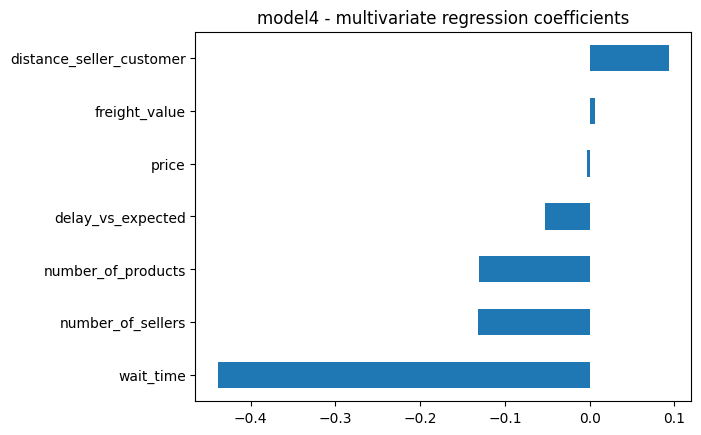

In [21]:
# model4 - multivariate regression coefficients bar chart

model4.params[1:].sort_values().plot(kind='barh').set_title("model4 - multivariate regression coefficients");


- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explainability of `review_score` lies outside of the orders dataset.

Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant

**Check model performance**

In [25]:
# Regression performance should not be measured only by its R-squared.
# Let's visualize the distribution of the predictions, and especially the residuals.
# Compute the residuals

predicted_review_score = model4.predict(orders_standardized[features])
residuals = orders_standardized.review_score - predicted_review_score

residuals.head()

0   -0.302818
1   -0.173899
2    0.677553
3    0.617684
4    0.436440
dtype: float64

In [26]:
# the residuals can also be computed with model4.resid
model4.resid.head()

0   -0.302818
1   -0.173899
2    0.677553
3    0.617684
4    0.436440
dtype: float64

In [27]:
# The mean of the residuals is equal to 0 (here, very close to 0):

residuals.mean()

-3.047836423236316e-14

In [28]:
# Compute the associated RMSE:

rmse = (residuals**2).mean()**0.5
rmse

1.1884979707470877

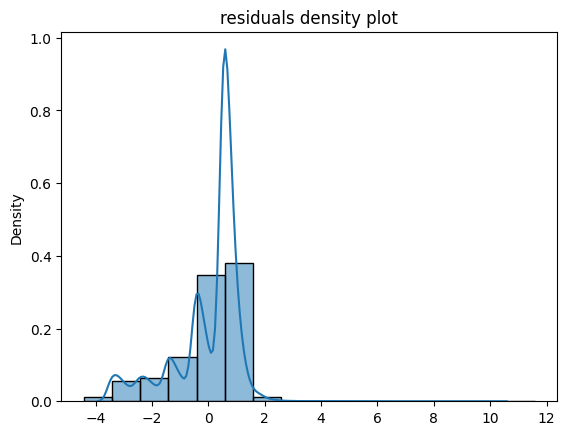

In [30]:
# histogram of residuals

sns.histplot(residuals, kde=True, stat='density', discrete=True).set_title('residuals density plot');

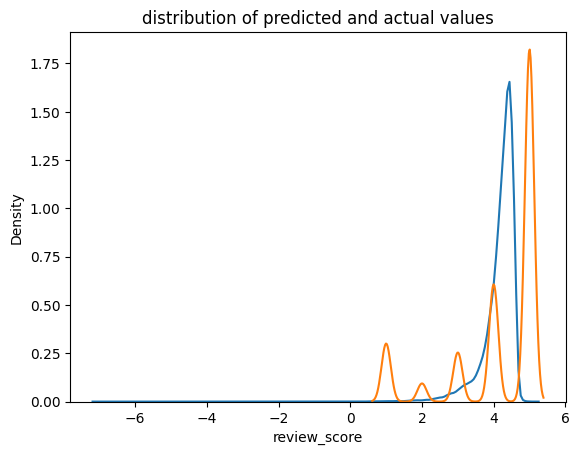

In [31]:
# Explication of the shape of the residuals distplot by ploting the
# distribution of the review_score and the distribution of the predicted_review_score
# on the same graph

sns.kdeplot(predicted_review_score, label='predicted review score')
sns.kdeplot(orders.review_score, label = 'actual review score').set_title('distribution of predicted and actual values');

**Conclusion**


It is hard to regress the `review_score` of an order vs. its `wait_time`. because the `review_score` is a discrete number that could also be interpreted as a category: 1 (very bad), 2 (bad), 3 (average), 4 (good), 5 (excellent).

So in the end, this model is not so great, for two reasons:
- there is not enough features to explain a significant proportion of the review_scores (low R-squared)
- fitting a "linear regression" function to a discrete classification problem

So instead on working on individual orders and trying to explain their discrete `review_score` based on the `wait_time`, let's focus the analysis on the sellers, aggregating the orders by sellers, in the sellers_analysis notebook.